<a href="https://colab.research.google.com/github/SeaWar741/HackMTY2021/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
!pip install pmdarima

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# lets set the figure size and color scheme for plots
# personal preference and not needed).
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [110]:
#read the data
df = pd.read_csv("IndicadoresLimpiosV2.csv")
df = df.iloc[: , 1:]
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')


In [111]:
df.columns = df.columns.str.replace(' ', '_')

In [113]:

X = df[['Producto_interno_bruto',
 'Impuestos_sobre_los_productos,_netos',
 'Valor_agregado_bruto',
 'Actividades_primarias',
 'Agricultura,_cría_y_explotación_de_animales,_aprovechamiento_forestal,_pesca_y_caza',
 'Agricultura',
 'Cría_y_explotación_de_animales',
 'Aprovechamiento_forestal',
 '_Pesca,_caza_y_captura',
 'Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales',
 'Actividades_secundarias',
 'Minería',
 'Extracción_de_petróleo_y_gas',
 '_Minería_de_minerales_metálicos_y_no_metálicos,_excepto_petróleo_y_gas',
 'Servicios_relacionados_con_la_minería',
 'Generación,_transmisión_y_distribución_de_energía_eléctrica,_suministro_de_agua_y_de_gas_por_ductos_al_consumidor_final',
 'Generación,_transmisión_y_distribución_de_energía_eléctrica',
 'Suministro_de_agua_y_suministro_de_gas_por_ductos_al_consumidor_final',
 'Construcción',
 'Edificación',
 'Construcción_de_obras_de_ingeniería_civil',
 'Trabajos_especializados_para_la_construcción',
 'Industrias_manufactureras',
 'Industria_alimentaria',
 'Elaboración_de_alimentos_para_animales',
 'Molienda_de_granos_y_de_semillas_y_obtención_de_aceites_y_grasas',
 'Elaboración_de_azúcares,_chocolates,_dulces_y_similares',
 'Conservación_de_frutas,_verduras,_guisos_y_otros_alimentos_preparados',
 'Elaboración_de_productos_lácteos',
 'Matanza,_empacado_y_procesamiento_de_carne_de_ganado,_aves_y_otros_animales_comestibles',
 'Preparación_y_envasado_de_pescados_y_mariscos',
 'Elaboración_de_productos_de_panadería_y_tortillas',
 'Otras_industrias_alimentarias',
 'Industria_de_las_bebidas_y_del_tabaco',
 'Industria_de_las_bebidas',
 'Industria_del_tabaco',
 'Fabricación_de_insumos_textiles_y_acabado_de_textiles',
 'Preparación_e_hilado_de_fibras_textiles,_y_fabricación_de_hilos',
 'Fabricación_de_telas',
 'Acabado_de_productos_textiles_y_fabricación_de_telas_recubiertas',
 'Fabricación_de_productos_textiles,_excepto_prendas_de_vestir',
 'Confección_de_alfombras,_blancos_y_similares',
 'Fabricación_de_otros_productos_textiles,_excepto_prendas_de_vestir',
 'Fabricación_de_prendas_de_vestir',
 'Fabricación_de_prendas_de_vestir_de_tejido_de_punto',
 'Confección_de_prendas_de_vestir',
 'Confección_de_accesorios_de_vestir_y_otras_prendas_de_vestir_no_clasificados_en_otra_parte',
 'Curtido_y_acabado_de_cuero_y_piel,_y_fabricación_de_productos_de_cuero,_piel_y_materiales_sucedáneos',
 'Curtido_y_acabado_de_cuero_y_piel',
 'Fabricación_de_calzado',
 'Fabricación_de_otros_productos_de_cuero,_piel_y_materiales_sucedáneos',
 'Industria_de_la_madera',
 'Aserrado_y_conservación_de_la_madera',
 'Fabricación_de_laminados_y_aglutinados_de_madera',
 'Fabricación_de_otros_productos_de_madera',
 'Industria_del_papel',
 'Fabricación_de_pulpa,_papel_y_cartón',
 'Fabricación_de_productos_de_cartón_y_papel',
 'Impresión_e_industrias_conexas',
 'Fabricación_de_productos_derivados_del_petróleo_y_del_carbón',
 'Industria_química',
 'Fabricación_de_productos_químicos_básicos',
 'Fabricación_de_resinas_y_hules_sintéticos,_y_fibras_químicas',
 'Fabricación_de_fertilizantes,_pesticidas_y_otros_agroquímicos',
 'Fabricación_de_productos_farmacéuticos',
 'Fabricación_de_pinturas,_recubrimientos_y_adhesivos',
 'Fabricación_de_jabones,_limpiadores_y_preparaciones_de_tocador',
 'Fabricación_de_otros_productos_químicos',
 'Industria_del_plástico_y_del_hule',
 'Fabricación_de_productos_de_plástico',
 'Fabricación_de_productos_de_hule',
 'Fabricación_de_productos_a_base_de_minerales_no_metálicos',
 'Fabricación_de_productos_a_base_de_arcillas_y_minerales_refractarios',
 'Fabricación_de_vidrio_y_productos_de_vidrio',
 'Fabricación_de_cemento_y_productos_de_concreto',
 'Fabricación_de_cal,_yeso_y_productos_de_yeso',
 'Fabricación_de_otros_productos_a_base_de_minerales_no_metálicos',
 'Industrias_metálicas_básicas',
 'Industria_básica_del_hierro_y_del_acero',
 'Fabricación_de_productos_de_hierro_y_acero',
 'Industria_básica_del_aluminio',
 'Industrias_de_metales_no_ferrosos,_excepto_aluminio',
 'Moldeo_por_fundición_de_piezas_metálicas',
 'Fabricación_de_productos_metálicos',
 'Fabricación_de_productos_metálicos_forjados_y_troquelados',
 'Fabricación_de_herramientas_de_mano_sin_motor_y_utensilios_de_cocina_metálicos',
 'Fabricación_de_estructuras_metálicas_y_productos_de_herrería',
 'Fabricación_de_calderas,_tanques_y_envases_metálicos',
 'Fabricación_de_herrajes_y_cerraduras',
 'Fabricación_de_alambre,_productos_de_alambre_y_resortes',
 'Maquinado_de_piezas_metálicas_y_fabricación_de_tornillos',
 'Recubrimientos_y_terminados_metálicos',
 'Fabricación_de_otros_productos_metálicos',
 'Fabricación_de_maquinaria_y_equipo',
 'Fabricación_de_maquinaria_y_equipo_agropecuario,_para_la_construcción_y_para_la_industria_extractiva',
 'Fabricación_de_maquinaria_y_equipo_para_las_industrias_manufactureras,_excepto_la_metalmecánica',
 'Fabricación_de_maquinaria_y_equipo_para_el_comercio_y_los_servicios',
 'Fabricación_de_equipo_de_aire_acondicionado,_calefacción,_y_de_refrigeración_industrial_y_comercial',
 'Fabricación_de_maquinaria_y_equipo_para_la_industria_metalmecánica',
 'Fabricación_de_motores_de_combustión_interna,_turbinas_y_transmisiones',
 'Fabricación_de_otra_maquinaria_y_equipo_para_la_industria_en_general',
 'Fabricación_de_equipo_de_computación,_comunicación,_medición_y_de_otros_equipos,_componentes_y_accesorios_electrónicos',
 'Fabricación_de_computadoras_y_equipo_periférico',
 'Fabricación_de_equipo_de_comunicación',
 'Fabricación_de_equipo_de_audio_y_de_video',
 'Fabricación_de_componentes_electrónicos',
 'Fabricación_de_instrumentos_de_medición,_control,_navegación,_y_equipo_médico_electrónico',
 'Fabricación_y_reproducción_de_medios_magnéticos_y_ópticos',
 'Fabricación_de_accesorios,_aparatos_eléctricos_y_equipo_de_generación_de_energía_eléctrica',
 'Fabricación_de_accesorios_de_iluminación',
 'Fabricación_de_aparatos_eléctricos_de_uso_doméstico',
 'Fabricación_de_equipo_de_generación_y_distribución_de_energía_eléctrica',
 'Fabricación_de_otros_equipos_y_accesorios_eléctricos',
 'Fabricación_de_equipo_de_transporte',
 'Fabricación_de_automóviles_y_camiones',
 'Fabricación_de_carrocerías_y_remolques',
 'Fabricación_de_partes_para_vehículos_automotores',
 'Fabricación_de_equipo_aeroespacial',
 'Fabricación_de_equipo_ferroviario',
 'Fabricación_de_embarcaciones',
 'Fabricación_de_otro_equipo_de_transporte',
 'Fabricación_de_muebles,_colchones_y_persianas',
 'Fabricación_de_muebles,_excepto_de_oficina_y_estantería',
 'Fabricación_de_muebles_de_oficina_y_estantería',
 'Fabricación_de_colchones,_persianas_y_cortineros',
 'Otras_industrias_manufactureras',
 'Fabricación_de_equipo_no_electrónico_y_material_desechable_de_uso_médico,_dental_y_para_laboratorio,_y_artículos_oftálmicos',
 'Otras_industrias_manufactureras.1',
 'Actividades_terciarias',
 'Comercio_al_por_mayor',
 'Comercio_al_por_menor',
 'Transportes,_correos_y_almacenamiento',
 'Transporte_aéreo',
 'Transporte_por_ferrocarril',
 'Transporte_por_agua',
 'Autotransporte_de_carga',
 'Transporte_terrestre_de_pasajeros,_excepto_por_ferrocarril',
 'Transporte_por_ductos._Transporte_turístico._Servicios_relacionados_con_el_transporte',
 'Servicios_postales._Servicios_de_mensajería_y_paquetería',
 'Servicios_de_almacenamiento',
 'Información_en_medios_masivos',
 'Edición_de_periódicos,_revistas,_libros,_software_y_otros_materiales,_y_edición_de_estas_publicaciones_integrada_con_la_impresión',
 'Industria_fílmica_y_del_video,_e_industria_del_sonido',
 'Radio_y_televisión',
 'Telecomunicaciones',
 'Procesamiento_electrónico_de_información,_hospedaje_y_otros_servicios_relacionados',
 'Otros_servicios_de_información',
 'Servicios_financieros_y_de_seguros',
 'Banca_central._Instituciones_de_intermediación_crediticia_y_financiera_no_bursátil._Actividades_bursátiles,_cambiarias_y_de_inversión_financiera',
 'Compañías_de_fianzas,_seguros_y_pensiones',
 'Servicios_inmobiliarios_y_de_alquiler_de_bienes_muebles_e_intangibles',
 'Servicios_inmobiliarios',
 'Servicios_de_alquiler_de_bienes_muebles._Servicios_de_alquiler_de_marcas_registradas,_patentes_y_franquicias',
 'Servicios_profesionales,_científicos_y_técnicos',
 'Corporativos',
 'Servicios_de_apoyo_a_los_negocios_y_manejo_de_residuos_y_desechos,_y_servicios_de_remediación',
 'Servicios_educativos',
 'Servicios_de_salud_y_de_asistencia_social',
 'Servicios_médicos_de_consulta_externa_y_servicios_relacionados',
 'Hospitales',
 'Residencias_de_asistencia_social_y_para_el_cuidado_de_la_salud._Otros_servicios_de_asistencia_social',
 'Servicios_de_esparcimiento_culturales_y_deportivos,_y_otros_servicios_recreativos',
 'Servicios_artísticos,_culturales_y_deportivos,_y_otros_servicios_relacionados',
 'Museos,_sitios_históricos,_zoológicos_y_similares._Servicios_de_entretenimiento_en_instalaciones_recreativas_y_otros_servicios_recreativos',
 'Servicios_de_alojamiento_temporal_y_de_preparación_de_alimentos_y_bebidas',
 'Servicios_de_alojamiento_temporal',
 'Servicios_de_preparación_de_alimentos_y_bebidas',
 'Otros_servicios_excepto_actividades_gubernamentales',
 'Servicios_de_reparación_y_mantenimiento',
 'Servicios_personales',
 'Asociaciones_y_organizaciones._Hogares_con_empleados_domésticos',
 'Actividades_legislativas,_gubernamentales,_de_impartición_de_justicia_y_de_organismos_internacionales_y_extraterritoriales',
 'US_inflation',
 'Valor_del_peso',
 'Remesas',
 'Acciones_negociadas,_valor_total_(US$_a_precios_actuales)',
 'Ahorro_ajustado:_ahorro_nacional_neto_(US$_actuales)',
 'Balanza_comercial_de_bienes_y_servicios_(US$_a_precios_actuales)',
 'Cambios_en_las_reservas_netas_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Capitalización_en_el_mercado_de_empresas_nacionales_que_cotizan_en_bolsa_(USD_a_precios_actuales)',
 'Comercio_neto_de_bienes_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Comercio_neto_de_bienes_y_servicios_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Consumo_de_energía_eléctrica_(kWh_per_cápita)',
 'Consumo_de_energía_procedente_de_combustibles_fósiles_(%_del_total)',
 'Consumo_de_energía_renovable_(%_del_consumo_total_de_energía_final)',
 'Desempleo,_total_(%_de_la_población_activa_total)_(estimación_modelado_OIT)',
 'Deuda_a_corto_plazo_(%_de_las_exportaciones_de_bienes,_servicios_e_ingresos_primario)',
 'Deuda_a_corto_plazo_(%_del_total_de_la_deuda_externa)',
 'Deuda_a_corto_plazo_(%_del_total_de_reservas)',
 'Deuda_externa_acumulada_(%_del_INB)',
 'Deuda_externa_acumulada,_a_corto_plazo_(DOD,_US$_a_precios_actuales)',
 'Deuda_externa_acumulada,_a_largo_plazo_(deuda_desembolsada_y_pendiente_:DOD,_US$_a_precios_actuales)',
 'Deuda_externa_acumulada,_privada_sin_garantía_(PNG)_(DOD,_US$_a_precios_actuales)',
 'Deuda_externa_acumulada,_pública_y_con_garantía_pública_(PPG)__(DOD,_US$_a_precios_actuales)',
 'Deuda_externa_acumulada,_total_(DOD,_US$_a_precios_actuales)',
 'Export_unit_value_index_(2000_=_100)',
 'Exportaciones_de_bienes_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Exportaciones_de_bienes_y_servicios_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Exportaciones_de_bienes_y_servicios_(US$_a_precios_constantes_de_2010)',
 'Exportaciones_de_mercaderías_(US$_a_precios_actuales)',
 'Exportaciones_de_productos_de_alta_tecnología_(US$_a_precios_actuales)',
 'Exportaciones_de_servicios_comerciales_(US$_a_precios_actuales)',
 'Exportaciones_de_servicios_de_TIC_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Importaciones_de_bienes_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Importaciones_de_bienes_y_servicios_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Importaciones_de_bienes_y_servicios_(US$_a_precios_constantes_de_2010)',
 'Importaciones_de_mercaderías_(US$_a_precios_actuales)',
 'Importaciones_de_servicios_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Importaciones_de_servicios_comerciales_(US$_a_precios_actuales)',
 'Índice_de_desempeño_logístico:_calidad_de_la_infraestructura_relacionada_con_el_comercio_y_el_transporte_(1=_baja_a_5=_alta)',
 'Índice_de_precios_al_consumidor_(2010_=_100)',
 'Índice_de_producción_animal_(2004-2006_=_100)',
 'Índice_de_producción_de_alimentos_(2004-2006_=_100)',
 'Índice_de_valor_de_exportación_(2000_=_100)',
 'Índice_del_volumen_de_exportaciones_(2000_=_100)',
 'Índice_del_volumen_de_las_importaciones_(2000_=_100)',
 'Industria,_valor_agregado_(%_del_PIB)',
 'Industria,_valor_agregado_(US$_a_precios_constantes_de_2010)',
 'Industrialización,_valor_agregado_(US$_a_precios_constantes_de_2010)',
 'Inflación,_deflactor_del_PIB:_series_vinculadas_(%_anual)',
 'Inflación,_índice_de_deflación_del_PIB_(%_anual)',
 'Inflación,_precios_al_consumidor_(%_anual)',
 'Ingreso_interno_bruto_(UMN_a_precios_constantes)',
 'Ingreso_nacional_bruto_(ING)_(US$)',
 'Ingreso_nacional_neto_ajustado_(%_de_crecimiento_anual)',
 'Ingreso_nacional_neto_ajustado_(US$_constantes_del_año_2010)',
 'Ingreso_nacional_neto_ajustado_per_cápita_(%_de_crecimiento_anual)',
 'Ingreso_nacional_neto_ajustado_per_cápita_(US$_constantes_del_año_2010)',
 'Pago_de_intereses_(%_del_gasto)',
 'Pago_de_intereses_(UMN_a_precios_actuales)',
 'PGP,_bonos_(FLN,_US$_a_precios_actuales)',
 'PIB_(US$_a_precios_constantes_de_2010)',
 'PIB_per_cápita_(US$_a_precios_constantes_de_2010)',
 'Precio_de_la_gasolina_para_el_usuario_(US$_por_litro)',
 'Producción_acuícola_(toneladas_métricas)',
 'Producción_de_cereales_(toneladas_métricas)',
 'Producción_de_electricidad_a_partir_de_carbón__(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_de_gas_natural_(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_de_petróleo,_gas_y_carbón_(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_hidroeléctricas_(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_nucleares_(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_renovables,_excluida_la_hidroeléctrica_(%_del_total)',
 'Producción_de_electricidad_a_partir_de_fuentes_renovables,_excluida_la_hidroeléctrica_(kilovatio-hora)',
 'Producción_de_electricidad_a_partir_del_petróleo_(%_del_total)',
 'Producción_de_energía_eléctrica_renovable_(%_de_la_producción_total_de_electricidad)',
 'Producción_de_la_pesca_de_captura_(toneladas_métricas)',
 'Relación_entre_empleo_y_población,_mayores_de_15\xa0años,_total_(%)_(estimación_nacional)',
 'Remesas_de_trabajadores_y_compensación_de_empleados,_pagadas_(US$_a_precios_actuales)',
 'Saldo_en_cuenta_corriente_(balanza_de_pagos,_US$_a_precios_actuales)',
 'Services,_value_added_(constant_2010_US$)',
 'Servicios,_valor_agregado_(US$_actuales)',
 'Tasa_de_interés_activa_(%)',
 'Tasa_de_interés_de_los_depósitos_(%)',
 'Tasa_de_interés_real_(%)',
 'Tasa_de_participación_en_la_fuerza_laboral,_de_15_a_24\xa0años,_total_(%)_(estimación_nacional)',
 'Tasa_de_participación_en_la_fuerza_laboral,_total_(%_de_la_población_total_mayor_de_15\xa0años)_(estimación_nacional)',
 'Tasa_de_participación_en_la_fuerza_laboral,_total_(%_del_total_de_la_población_entre_15-64_años)_(estimación_modelado_OIT)',
 'Tasa_de_población_activa,_total_(%_de_la_población_total_mayor_de_15_años)_(estimación_modelado_OIT)',
 'Textiles_e_indumentaria_(%_del_valor_agregado_en_la_industrialización)',
 'Turismo_internacional,_recibos_(US$_a_precios_actuales)',
 'Salario_Minimo',
 'Valor_del_dolar_en_peso_mexicano_Cierre']]

y = df["INPC"]
    
X_train = X[X.index < 503]
y_train = y[y.index < 503]             
    
X_test = X[X.index >= 503]   
y_test = y[y.index >= 503]

In [114]:
y

0       44.809270
1       45.052246
2       45.272547
3       45.386070
4       45.530449
          ...    
514    112.903000
515    113.132000
516    113.550000
517    113.820000
518    113.790000
Name: INPC, Length: 519, dtype: float64

In [115]:
from sklearn.ensemble.forest import RandomForestRegressor

In [116]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
#features = X_train[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(X_train, y_train)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_INPC'}).set_index('predicted_INPC')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_INPC'}).set_index('predicted_INPC')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [117]:
RF_predict = RF_predict.reset_index()
predictions = RF_predict.to_numpy()
predictions

array([[ 45.0375331 ],
       [ 45.12743425],
       [ 45.27606188],
       [ 45.3708313 ],
       [ 45.50612737],
       [ 45.55126959],
       [ 45.96256477],
       [ 46.00228477],
       [ 45.98885393],
       [ 46.01589267],
       [ 46.22191602],
       [ 46.25861082],
       [ 46.51988442],
       [ 46.5324595 ],
       [ 46.70380169],
       [ 46.78190134],
       [ 46.98718119],
       [ 47.00865167],
       [ 47.48187571],
       [ 47.57113971],
       [ 47.71608889],
       [ 47.76264628],
       [ 48.08499983],
       [ 48.21454644],
       [ 48.56951595],
       [ 48.58182977],
       [ 48.54993992],
       [ 48.56256968],
       [ 48.73538936],
       [ 48.8777198 ],
       [ 49.10758588],
       [ 49.16635509],
       [ 49.19507607],
       [ 49.2381014 ],
       [ 49.29996061],
       [ 49.30208894],
       [ 49.24390692],
       [ 49.24390692],
       [ 49.38988395],
       [ 49.46734249],
       [ 49.81656256],
       [ 49.9103739 ],
       [ 50.16235193],
       [ 50

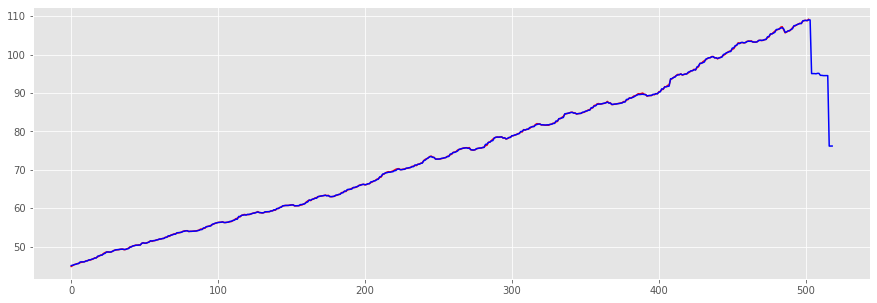

In [118]:
plt.figure(figsize=(15,5))
plt.plot(y_train,'r')
plt.plot(predictions,'b')

In [119]:
predDataframe = pd.DataFrame(predictions,columns=['Preducciones'])
predDataframe.head()

,Preducciones
0,45.037533
1,45.127434
2,45.276062
3,45.370831
4,45.506127


In [120]:
predDataframe.to_csv("PrediccionesRandomForestV2.csv")